Hola , buenos dias,tardes o noches ,este es mi primer proyecto de analisis de datos , he estado practicando algunos datos pero no llego a terminarlos porque no se que pasos seguir o llego hasta aun punto y no se que mas hacer , estoy haciendo una documentacion para que se pueda ver mas limpio este proyecto.

Soy algo inexperto en algunos campos asi que tendre algunos errores , tratare de explicar lo mas posible y culminar el proyecto.

La documentacion la saque de ([link de la infomracion/autor](https://github.com/francomanca93/analisis-de-datos))
este proyecto tiene como fin enseñar a algun estudiante que quiera ver como se podria hacer proyecto de analisis de datos y agregar algo mas a mi portafolio, sin mas comenzemos .

En este punto de año o para este año existe "Chat GPT" que es una herramiento de mucha ayuda pero no se deberia de usar demasiado creo yo , tratare de usar lo menos posible para ayudarme , me ayudare de documentacion de las librerias y no encontrar mas salidas , recurrare a otros proyectos parecidos y si no sera ayudarme con chatgpt.

In [1]:
# Importaremos librerias que previamente fuero instalados en nuestro entorno virtual , que consideo es un buena
# practica para hacerlo mas limpio

# Las librerias que necesitaremos seran "PANDAS" y "MATPLOTLIB"
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import scipy

In [2]:
#Crearemos un dataframe el cual cargaremos el dato que trabajaremos y sera sobre el covid_19
df=pd.read_csv("archive/covid_19_data.csv")

# la funcion --> .head <-- sirve para imprimir los 5 primeros datos del dataframe que serian
# los 5 primeros columnas y 5 primeras filas , 
# comienza a partir del cero por que python lee desde el cero como primer numero
# df.head()

#con este codigo podemos ver todos los datos ,desde la primera fila hasta la ultima fila
display(df.head(5))

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


In [3]:
#ahora haces un informacion breve,podemos ver todos los datos y 
#la cantidad de datos que tiene todos las columnas , podemos ver si les falta datos o no
#podemos ver si hay datos nulos o faltantes cuando vemos una desigualdad 
#tambien podemos ver los tipos de datos que son int64,object,float64
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306429 entries, 0 to 306428
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   SNo              306429 non-null  int64  
 1   ObservationDate  306429 non-null  object 
 2   Province/State   228326 non-null  object 
 3   Country/Region   306429 non-null  object 
 4   Last Update      306429 non-null  object 
 5   Confirmed        306429 non-null  float64
 6   Deaths           306429 non-null  float64
 7   Recovered        306429 non-null  float64
dtypes: float64(3), int64(1), object(4)
memory usage: 18.7+ MB


In [4]:
display(df.sample(5))

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
86070,86071,08/12/2020,Mie,Japan,2021-04-02 15:13:53,261.0,1.0,99.0
271157,271158,04/13/2021,Tomsk Oblast,Russia,2021-04-14 04:20:41,31711.0,372.0,30724.0
45357,45358,06/18/2020,Liaoning,Mainland China,2021-04-02 15:13:53,153.0,2.0,147.0
18215,18216,04/23/2020,New York,US,2020-04-24 03:31:35,263460.0,20973.0,0.0
25455,25456,05/15/2020,Mayotte,France,2021-04-02 15:13:53,1210.0,16.0,627.0


Cambiaremos los tipos de valores de la columna ['Confirmed','Deaths',Recovered'],
son valores flotantes pero como no tiene valores flotantes entonces 
lo podria pasar a valores enteros para trabajarlos mejor.

In [ ]:
# Lo que podiamos corregir seria pasar los valores flotantes a valores enteros 
# como podemos ver en dataframe de arriba tenemos valores flotantes en ['Confirmed	,Deaths	,Recovered]


# Como podemos ver de la columna Confirmed son valores flotantes , lo puedo pasar a valores enteros para trabajarlos 
# mas tranquilo , igualmente hare con la columna Deaths , Recovered 
# Para que podamos trabajar mas tranquilo.

#display(df.sample(3))

#data_C=['Confirmed']
#for i in data_C :
#    for value in df[i].unique():
#        print(f'{i} value : {value}')


In [ ]:
# Igualmente como podemos ver los datos son flotantes pero no tiene valores flotantes 
# seria mejor pasarlos a valores enteros 
#data_D=['Deaths']
#for i in data_D :
#    for value in df[i].unique():
#        print(f'{i} value : {value}')

In [ ]:
# Igualmente podemos ver los valores flotantes pero sin flotantes 
# no tendria sentido dejarlos tal como estan si no tiene los valores del tipo que son "Flotantes"
#data_R=['Recovered']
#for i in data_R :
#    for value in df[i].unique():
#        print(f'{i} value : {value}')

In [8]:
df['Confirmed']=df['Confirmed'].astype(int)
df['Deaths']=df['Deaths'].astype(int)
df['Recovered']=df['Recovered'].astype(int)

display(df.sample(5))

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
81320,81321,08/06/2020,Arunachal Pradesh,India,2021-04-02 15:13:53,1948,3,1245
190594,190595,12/29/2020,Khyber Pakhtunkhwa,Pakistan,2021-04-02 15:13:53,57982,1627,52818
109852,109853,09/13/2020,Jiangxi,Mainland China,2021-04-02 15:13:53,935,1,934
76005,76006,07/30/2020,NaN,Papua New Guinea,2021-04-02 15:13:53,63,2,11
58375,58376,07/06/2020,Capital District,Colombia,2021-04-02 15:13:53,36554,871,14099


Como podemos ver en la columna ['Province/State','Country/Region'] , son de tipo texto o string , pandas por defecto los coloca como object , pero podemos cambiarlos para trabajar mejor los datos y no equivocarnos al revisar la data , tambien cambiare la columna ['ObservationDate','Last Update'] como valores "datetime".

In [9]:
df['Province/State']=df['Province/State'].astype('string')
df['Country/Region']=df['Country/Region'].astype('string')

In [21]:
df['ObservationDate']=pd.to_datetime(df['ObservationDate'],dayfirst=True)
df['ObservationDate']=df['ObservationDate'].dt.strftime('%d/%m/%Y')
df['ObservationDate']=pd.to_datetime(df['ObservationDate'],errors='coerce')


C:\Users\Zeus_\AppData\Local\Temp\ipykernel_1472\1923554823.py:1: UserWarning: Parsing dates in %m/%d/%Y format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  df['ObservationDate']=pd.to_datetime(df['ObservationDate'],dayfirst=True)
C:\Users\Zeus_\AppData\Local\Temp\ipykernel_1472\1923554823.py:3: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['ObservationDate']=pd.to_datetime(df['ObservationDate'],errors='coerce')


In [38]:
# Crea una copia de la columna 'Last Update' antes de modificarla
# df['Last Update Backup'] = df['Last Update']
# df=df.drop(columns=['Last Update Backup'])


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306429 entries, 0 to 306428
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   SNo              306429 non-null  int64         
 1   ObservationDate  306429 non-null  datetime64[ns]
 2   Province/State   306429 non-null  string        
 3   Country/Region   306429 non-null  string        
 4   Last Update      306429 non-null  object        
 5   Confirmed        306429 non-null  int64         
 6   Deaths           306429 non-null  int64         
 7   Recovered        306429 non-null  int64         
dtypes: datetime64[ns](1), int64(4), object(1), string(2)
memory usage: 18.7+ MB


In [12]:
correlacion= df.select_dtypes(include='number').corr()
display(correlacion.corr())

,SNo,Confirmed,Deaths,Recovered
SNo,1.000000,-0.870841,-0.828601,-0.814164
Confirmed,-0.870841,1.000000,0.960642,0.476260
Deaths,-0.828601,0.960642,1.000000,0.351147
Recovered,-0.814164,0.476260,0.351147,1.000000


In [36]:
#de esta manera ya se entiende mejor
#aqui podemos ver los datos nulos
#y con la variable sum() estariamos sumando todos los datos nulos de cada columna para 
#que no sea algo repetitivo
print(f'Datos Nulos:\n{df.isna().sum()}')


Datos Nulos:
SNo                0
ObservationDate    0
Province/State     0
Country/Region     0
Last Update        0
Confirmed          0
Deaths             0
Recovered          0
dtype: int64


In [ ]:
# Aqui estamos filtrando todos los valores nulos , no deberia de eliminarlos por que me va faltar informacion
# creo que seria una mala practica eleminar demasiados datos .
# Aqui solo estamos cambiando los valores nulos por valores NA/Desconocidos : en cualquiera de los casos esta bien 



df['Province/State']=df['Province/State'].fillna('Desconocidos')

#En caso de querer cambiar los valores una ves ya cambiados(valga la redundancia), solo tendria que remplazar : 

#df['Province/State'] = df['Province/State'].replace('Desconocidos')


In [29]:
display(df.sample(5))

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
59613,59614,2020-07-08,Desconocidos,Bulgaria,2021-04-02 15:13:53,6342,259,3166
285674,285675,2021-05-02,Tambov Oblast,Russia,2021-05-03 04:20:39,31632,477,29182
24983,24984,2020-05-14,Aruba,Netherlands,2021-04-02 15:13:53,101,3,93
210296,210297,2021-01-24,Casanare,Colombia,2021-04-02 15:13:53,10916,212,9953
184884,184885,2020-12-22,Desconocidos,Eritrea,2021-04-02 15:13:53,832,1,599


ahora con todos los datos ya corregidos y sin haber valores nulos , tocaria graficarlos 

En que ciudad y pais hubo mas registros de fallecidos :

TypeError: 'str' object is not callable

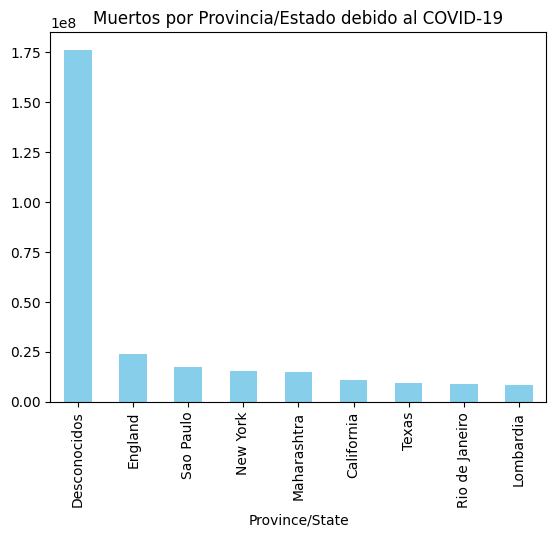

In [51]:
df_tasa_mortalidad_state=df.groupby('Province/State')['Deaths'].sum()


top_location_death=df_tasa_mortalidad_state.nlargest(9)



top_location_death.plot(kind='bar',color='skyblue',title='Muertos por Provincia/Estado debido al COVID-19')

plt.ylabel("Total de Muertos")
plt.xlabel("Estado")

plt.show()

TypeError: 'str' object is not callable

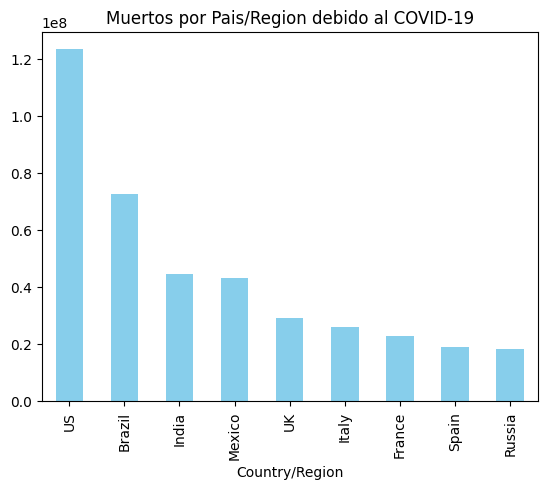

In [52]:
df_tasa_mortalidad_country=df.groupby('Country/Region')['Deaths'].sum()


top_location_death=df_tasa_mortalidad_country.nlargest(9)



top_location_death.plot(kind='bar',color='skyblue',title='Muertos por Pais/Region debido al COVID-19')

plt.ylabel("Total de Muertos")
plt.xlabel("Region")

plt.show()

TypeError: 'str' object is not callable

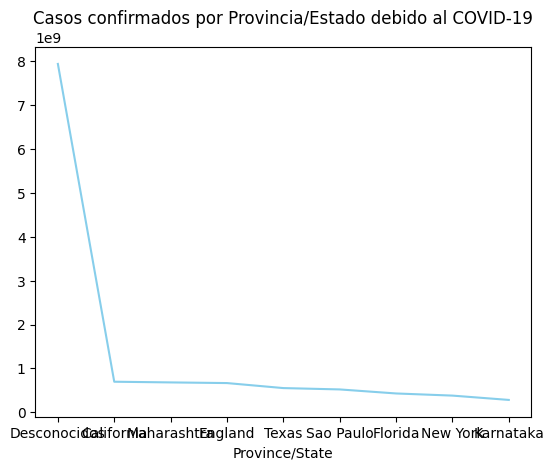

In [53]:
df_tasa_confirmado_state=df.groupby('Province/State')['Confirmed'].sum()


top_location_death=df_tasa_confirmado_state.nlargest(9)



top_location_death.plot(kind='line',color='skyblue',title='Casos confirmados por Provincia/Estado debido al COVID-19')

plt.ylabel("Total de casos confirmados")
plt.xlabel("Region")

plt.show()

TypeError: 'str' object is not callable

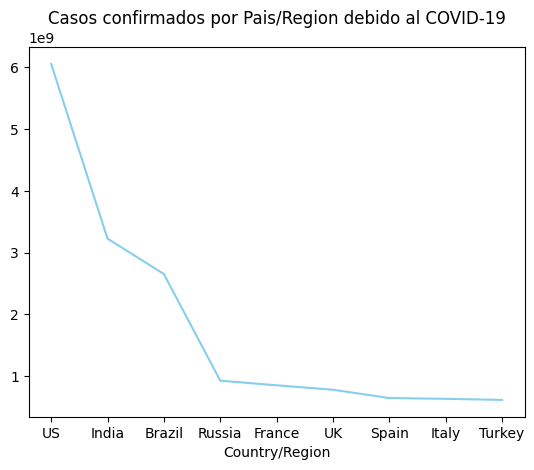

In [59]:
df_tasa_confirmado_country=df.groupby('Country/Region')['Confirmed'].sum()


top_location_death=df_tasa_confirmado_country.nlargest(9)



top_location_death.plot(kind='line',color='skyblue',title='Casos confirmados por Pais/Region debido al COVID-19')

plt.ylabel("Total de casos confirmados")
plt.xlabel("Pais/Region")

plt.show()

TypeError: 'str' object is not callable

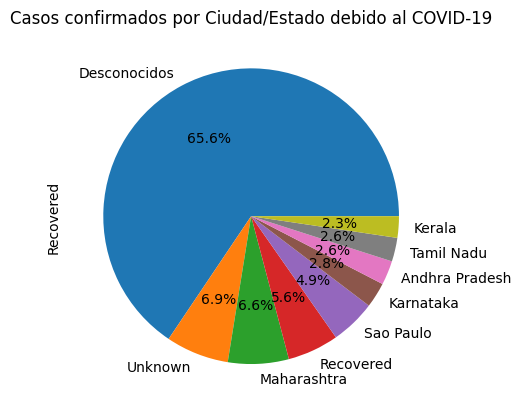

In [58]:
df_tasa_recovered_state=df.groupby('Province/State')['Recovered'].sum()

df_top=df_tasa_recovered_state.nlargest(9)


df_top.plot(kind='pie',autopct='%1.1f%%',title='Casos confirmados por Ciudad/Estado debido al COVID-19')

plt.ylabel("Total de casos recuperados")
plt.xlabel("Ciudad/Estado")


plt.show()

TypeError: 'str' object is not callable

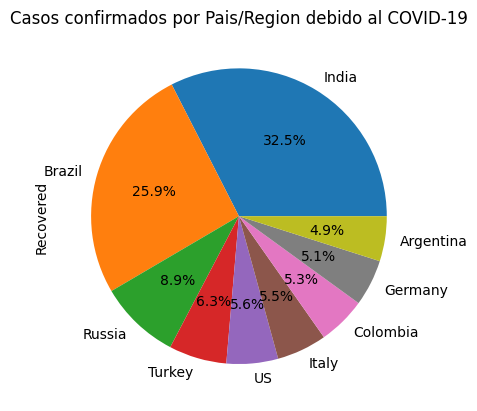

In [57]:
df_tasa_recovered_state=df.groupby('Country/Region')['Recovered'].sum()

df_top=df_tasa_recovered_state.nlargest(9)


df_top.plot(kind='pie',autopct='%1.1f%%',title='Casos confirmados por Pais/Region debido al COVID-19')

plt.ylabel("Total de casos recuperados")
plt.xlabel("Pais/Region")


plt.show()